# Anna Ciji Panakkal

## Milestone 2

### Research question/interests
My main resarch interest is if the crowd attendance affects the number of goals scored in the game in any way (increase with more attendance or vice-versa)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rawData = pd.read_csv("../data/raw/WorldCupMatches.csv")
rawData

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Milestone 3

### Task 1: EDA

In [ ]:
#dropping all NaN values so that we have cleaner data
rawData = rawData.dropna()
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           8

In [ ]:
#finding information about the dataset
rawData.shape

(850, 20)

In [ ]:
rawData.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
rawData.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
rawData.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [ ]:
rawData.nunique()

Year                     20
Datetime                601
Stage                    23
Stadium                 181
City                    151
Home Team Name           78
Home Team Goals          11
Away Team Goals           7
Away Team Name           83
Win conditions           43
Attendance              622
Half-time Home Goals      7
Half-time Away Goals      6
Referee                 366
Assistant 1             387
Assistant 2             408
RoundID                 101
MatchID                 835
Home Team Initials       77
Away Team Initials       82
dtype: int64

In [ ]:
#cleaning my dataset to have only columns that I need and creating a new coloumn for total goals scored
cleanData = rawData.drop(['Stage', 'Win conditions', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials', 'Datetime', 'Stadium', 'City'], axis=1)
cleanData['Total Goals'] = cleanData['Home Team Goals'] + cleanData['Away Team Goals']
cleanData

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Total Goals
0,1930.0,France,4.0,1.0,Mexico,4444.0,5.0
1,1930.0,USA,3.0,0.0,Belgium,18346.0,3.0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,24059.0,3.0
3,1930.0,Romania,3.0,1.0,Peru,2549.0,4.0
4,1930.0,Argentina,1.0,0.0,France,23409.0,1.0
...,...,...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica,51179.0,0.0
848,2014.0,Brazil,1.0,7.0,Germany,58141.0,8.0
849,2014.0,Netherlands,0.0,0.0,Argentina,63267.0,0.0
850,2014.0,Brazil,0.0,3.0,Netherlands,68034.0,3.0


C:\Users\ANNA\AppData\Local\Temp\ipykernel_8952\1647768179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleanData.corr()


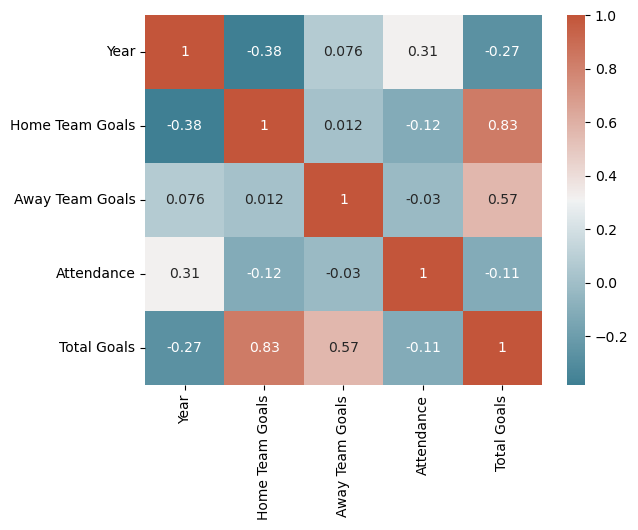

In [ ]:
#calculating the correlation matrix
corr = cleanData.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.savefig('../images/analysis3_eda1.png')

##### Since this plot does not give much information on my research topic, we are going to try a different approach.

##### I am now going to create three subsets of this data, by grouping according to year so i can assess the impact of attendance on the number of goals scored in three different seasons of the game.

In [ ]:
cleanData["Year"].unique()

array([1930., 1934., 1938., 1950., 1954., 1958., 1962., 1966., 1970.,
       1974., 1978., 1982., 1986., 1990., 1994., 1998., 2002., 2006.,
       2010., 2014.])

##### I will be creating tables for the years 1930, 1974 and 2014(to see difference in trends in the attendance vs goals scored throughout the years).Further I will plot a graph of home/away team goals vs attendace to see of there are any patterns there.

###### for year 1930

In [ ]:
data_sample1 = cleanData[cleanData["Year"].isin([1930])]
data_sample1

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Total Goals
0,1930.0,France,4.0,1.0,Mexico,4444.0,5.0
1,1930.0,USA,3.0,0.0,Belgium,18346.0,3.0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,24059.0,3.0
3,1930.0,Romania,3.0,1.0,Peru,2549.0,4.0
4,1930.0,Argentina,1.0,0.0,France,23409.0,1.0
5,1930.0,Chile,3.0,0.0,Mexico,9249.0,3.0
6,1930.0,Yugoslavia,4.0,0.0,Bolivia,18306.0,4.0
7,1930.0,USA,3.0,0.0,Paraguay,18306.0,3.0
8,1930.0,Uruguay,1.0,0.0,Peru,57735.0,1.0
9,1930.0,Chile,1.0,0.0,France,2000.0,1.0


<AxesSubplot: title={'center': 'Goals vs Attendance for 1930s'}, xlabel='Total Goals'>

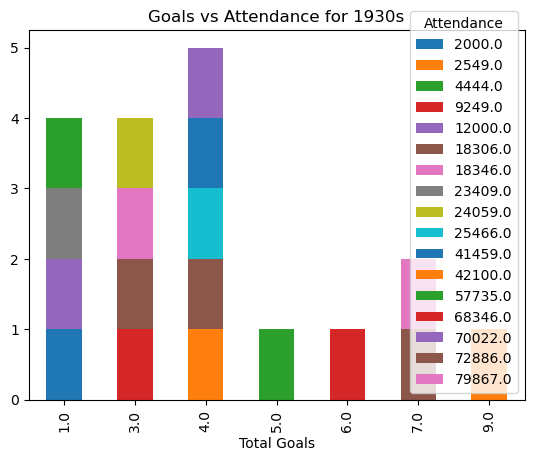

In [ ]:
data_sample1.groupby(['Total Goals', 'Attendance']).size().unstack().plot(kind='bar', stacked=True, legend = True, title='Goals vs Attendance for 1930s')

###### for year 1974

In [ ]:
data_sample2 = cleanData[cleanData["Year"].isin([1974])]
data_sample2

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Total Goals
232,1974.0,Brazil,0.0,0.0,Yugoslavia,62000.0,0.0
233,1974.0,Germany FR,1.0,0.0,Chile,81100.0,1.0
234,1974.0,German DR,2.0,0.0,Australia,17000.0,2.0
235,1974.0,Zaire,0.0,2.0,Scotland,27000.0,2.0
236,1974.0,Uruguay,0.0,2.0,Netherlands,55100.0,2.0
237,1974.0,Sweden,0.0,0.0,Bulgaria,23800.0,0.0
238,1974.0,Italy,3.0,1.0,Haiti,53000.0,4.0
239,1974.0,Poland,3.0,2.0,Argentina,32700.0,5.0
240,1974.0,Australia,0.0,3.0,Germany FR,53300.0,3.0
241,1974.0,Scotland,0.0,0.0,Brazil,62000.0,0.0


<AxesSubplot: title={'center': 'Goals vs Attendance for 1974s'}, xlabel='Total Goals'>

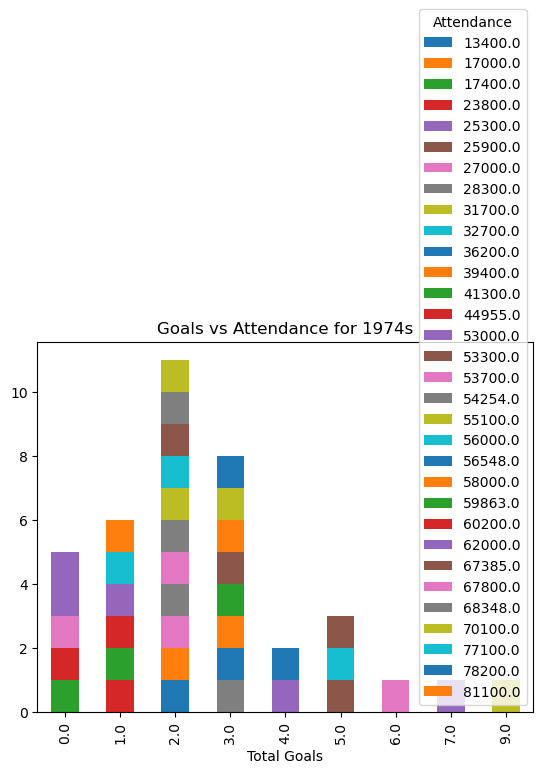

In [ ]:
data_sample2.groupby(['Total Goals', 'Attendance']).size().unstack().plot(kind='bar', stacked=True, legend = True, title='Goals vs Attendance for 1974s')

###### for year 2014

In [ ]:
data_sample3 = cleanData[cleanData["Year"].isin([2014])]
data_sample3

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Total Goals
772,2014.0,Brazil,3.0,1.0,Croatia,62103.0,4.0
773,2014.0,Mexico,1.0,0.0,Cameroon,39216.0,1.0
774,2014.0,Spain,1.0,5.0,Netherlands,48173.0,6.0
775,2014.0,Chile,3.0,1.0,Australia,40275.0,4.0
776,2014.0,Colombia,3.0,0.0,Greece,57174.0,3.0
...,...,...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica,51179.0,0.0
848,2014.0,Brazil,1.0,7.0,Germany,58141.0,8.0
849,2014.0,Netherlands,0.0,0.0,Argentina,63267.0,0.0
850,2014.0,Brazil,0.0,3.0,Netherlands,68034.0,3.0


<AxesSubplot: title={'center': 'Goals vs Attendance for 2014s'}, xlabel='Total Goals'>

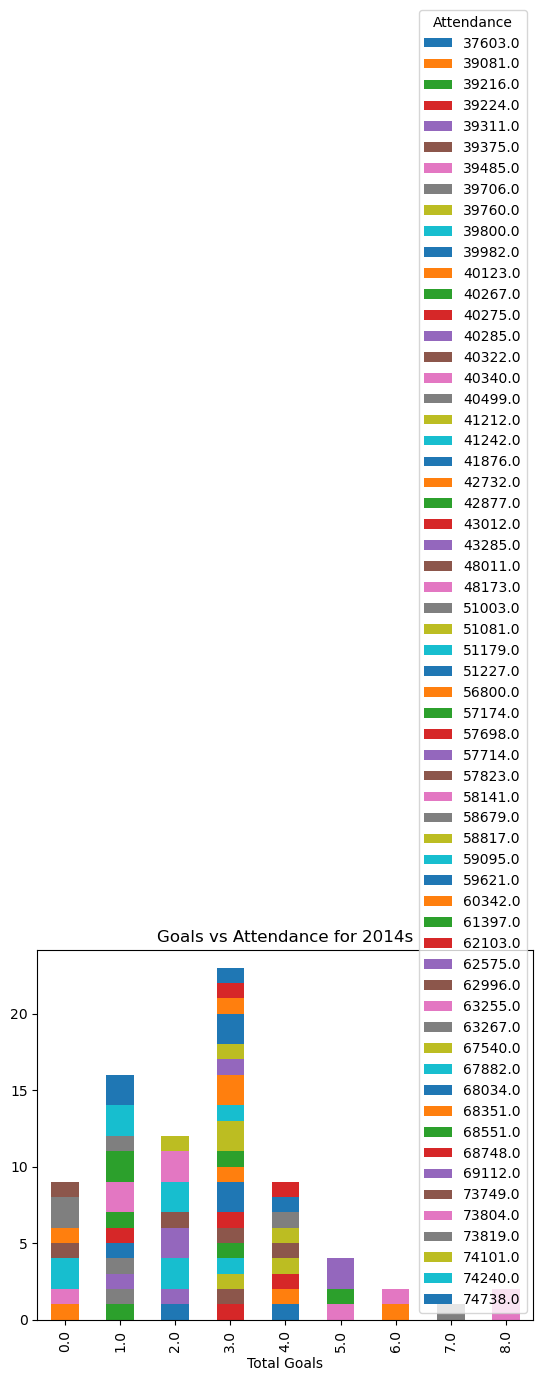

In [ ]:
data_sample3.groupby(['Total Goals', 'Attendance']).size().unstack().plot(kind='bar', stacked=True, legend = True, title='Goals vs Attendance for 2014s')

##### These graphs tell us the trends of how goals were scored according to attendance. As you can see, higher the attendance, higher the number of goals scored generally in the he 1930s dataset but you can see this trend change through out the years. In the 1974 dataset, you see that most most goals are scored when there isn't too much or too little attendance. But by 2014 you clearly see that a larger attendance brings down the number of goals scored which is interesting as one would imagine higher attendance having the opposite effect. We will explore the 2014 sample dataset more to look into this further as it is data from a more recent season.

##### to see if there are any trends in the different plots that I have missed

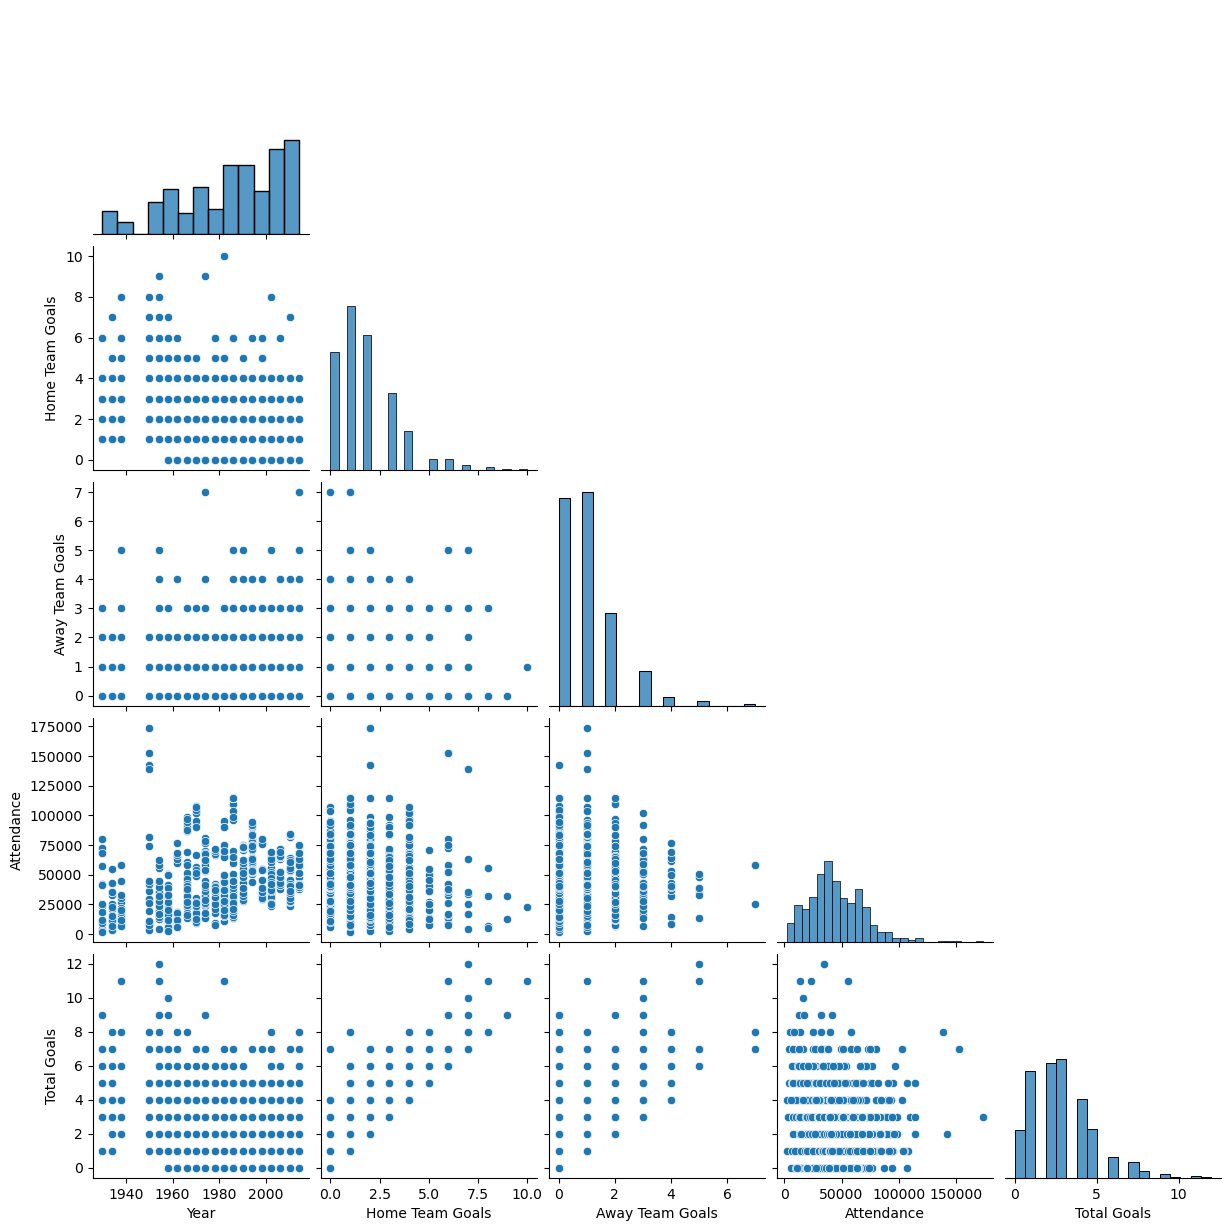

In [ ]:
sns.pairplot(cleanData, corner = True)
plt.savefig('../images/analysis3_eda2.png')

### Task 2: Analysis Pipeline

In [ ]:
# 1. Load Data
rawData = pd.read_csv("../data/raw/WorldCupMatches.csv")
rawData = rawData.dropna()
print(rawData.shape)

(850, 20)


In [ ]:
# 2. Clean Data
cleanData = rawData.drop(['Stage', 'Win conditions', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials', 'Datetime', 'Stadium', 'City'], axis=1)
cleanData = cleanData[cleanData["Year"].isin([2014])]
cleanData = cleanData.sort_values('Attendance', ascending=False)
cleanData = cleanData.reset_index()

In [ ]:
# checking to see if everything works
print(cleanData.shape)
print(cleanData.head())
print(cleanData.tail())

(78, 7)
   index    Year Home Team Name  Home Team Goals  Away Team Goals  \
0    851  2014.0        Germany              1.0              0.0   
1    828  2014.0        Germany              1.0              0.0   
2    782  2014.0      Argentina              2.0              1.0   
3    844  2014.0         France              0.0              1.0   
4    825  2014.0         France              0.0              1.0   

               Away Team Name  Attendance  
0                   Argentina     74738.0  
1                   Argentina     74738.0  
2  rn">Bosnia and Herzegovina     74738.0  
3                     Germany     74240.0  
4                     Germany     74240.0  
    index    Year Home Team Name  Home Team Goals  Away Team Goals  \
73    819  2014.0        Algeria              1.0              1.0   
74    797  2014.0       Honduras              1.0              2.0   
75    773  2014.0         Mexico              1.0              0.0   
76    784  2014.0        IR Iran 

In [ ]:
# 3. Process Data
cleanData['Total Goals'] = cleanData['Home Team Goals'] + cleanData['Away Team Goals']
cleanData

,index,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Total Goals
0,851,2014.0,Germany,1.0,0.0,Argentina,74738.0,1.0
1,828,2014.0,Germany,1.0,0.0,Argentina,74738.0,1.0
2,782,2014.0,Argentina,2.0,1.0,"rn"">Bosnia and Herzegovina",74738.0,3.0
3,844,2014.0,France,0.0,1.0,Germany,74240.0,1.0
4,825,2014.0,France,0.0,1.0,Germany,74240.0,1.0
...,...,...,...,...,...,...,...,...
73,819,2014.0,Algeria,1.0,1.0,Russia,39311.0,2.0
74,797,2014.0,Honduras,1.0,2.0,Ecuador,39224.0,3.0
75,773,2014.0,Mexico,1.0,0.0,Cameroon,39216.0,1.0
76,784,2014.0,IR Iran,0.0,0.0,Nigeria,39081.0,0.0


## Task 3: Method Chaining

##### cleaning up task 2 (will transfer to a python file once done)

In [ ]:
# method chaining imports
import pandas as pd

# Method Chain 1 (Load data, drop na rows, drop unneeded columns)
def load_and_process(filePath):
    unneededColumns = ['Stage', 'Win conditions', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials', 'Datetime', 'Stadium', 'City'] 
    df1 = (
        pd.read_csv("../data/raw/WorldCupMatches.csv")
        .dropna()
        .drop(unneededColumns, axis=1)
        .sort_values('Attendance', ascending=False)
        .reset_index(drop=True)
    )
    
    
# Method Chain 2 (adding column with total goals) 
def total_attendance (row):
    total_goals= cleanData['Home Team Goals'] + cleanData['Away Team Goals']    
    
    df1['Total Goals'] = (
        df1
        .apply(lambda row: total_attendance(row), axis=1)
    )
    return df1

# Method Chain 3 (dropping all rows where year != 2014)
def final_data(row):
    unneededRows = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010]
    
    df1 = (
        df1
        .drop(cleanData["Year"].isin(unneededData))
    )
    return df1
 

##### Testing my method to make sure it works and outputs as I intended.

In [ ]:
clean = load_and_process("../data/raw/WorldCupMatches.csv")
clean

##### transfering the method and imports to my functions python file and test again.

In [ ]:
import project_functions3 as p3
cleanData = p3.load_and_process("../data/raw/WorldCupMatches.csv")
cleanData

## Task 4: Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as p1
%matplotlib inline

In [ ]:
cleanData = p3.load_and_process("../data/raw/WorldCupMatches.csv")
cleanData

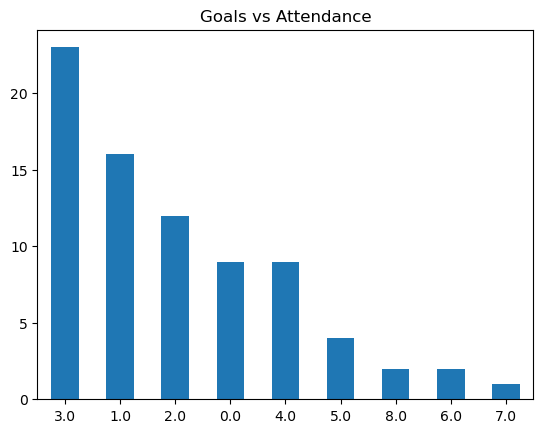

In [ ]:
cleanData["Total Goals"].value_counts().plot.bar(x='Total goals',y='Attendance', rot=0, title='Goals vs Attendance')
plt.savefig('../images/analysis3_RQ1.png')   

##### From this we can conclude that, higher the number of attendance, chances are scores goals are less likely scored, which is a surprising outcome considering the fact that we would have expected the vice versa because of morale boosts. Soccer/football (whatever you call in your country) is truly a game of concentration.

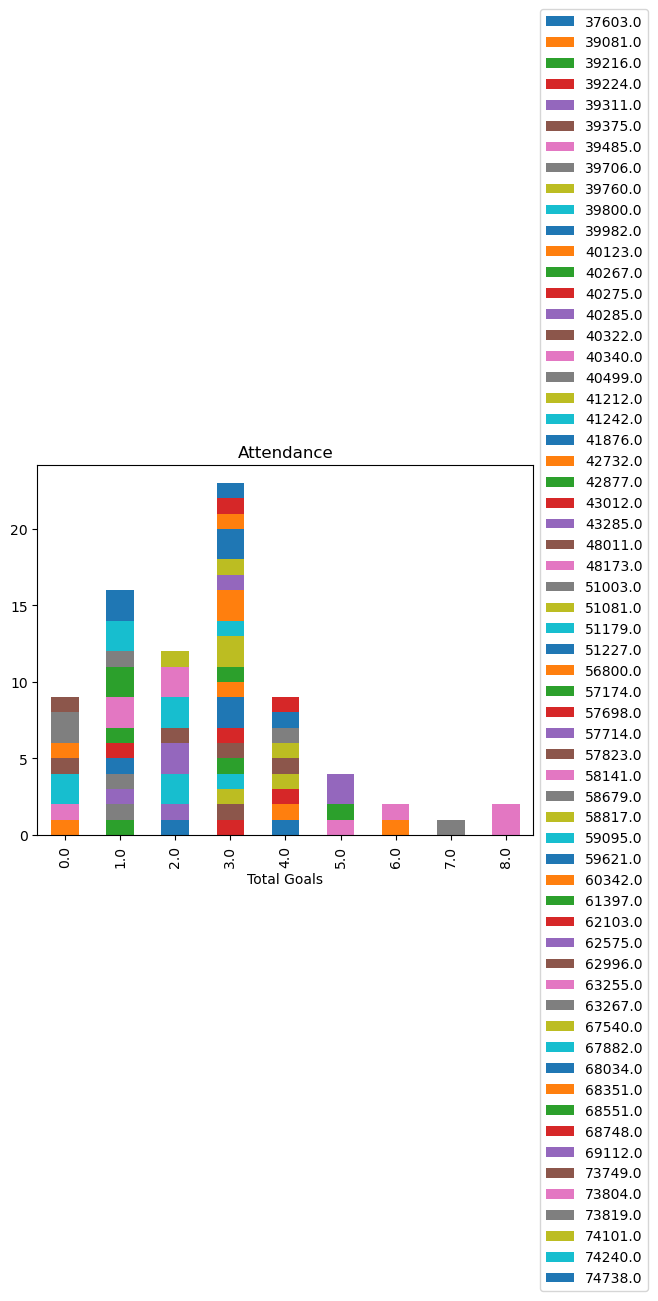

In [ ]:
cleanData.groupby(['Total Goals', 'Attendance']).size().unstack().plot(kind='bar', stacked=True, title='Attendance')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../images/analysis3_RQ2.png')
plt.show()

##### from this we can conclude that attendance and number of goals scored have an inversely propotional relationship

In [ ]:
data_sample3.to_csv("../data/processed/CleanData(Analysis3).csv", index=False,encoding='utf-8')